# **Trabalho 2: Perceptron Multicamada no problema MNIST**  
Anita Oliveira – 211068243  
Giovanni Catelli - 211043502

## 1. Importações, classes e métodos (Dataset $\textit{MNIST}$ e Modelos $\textit{MLP}$ com e sem $\textit{dropout}$)

In [1]:
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [63]:
class MNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.MNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.MNIST(
            root=self.root, train=False, transform=trans, download=True)

In [64]:
@d2l.add_to_class(MNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [65]:
dataset = MNIST()
X, y = next(iter(dataset.train_dataloader()))

print(len(dataset.train), len(dataset.val))
print(dataset.train.data.shape)
print(X.shape, X.dtype, y.shape, y.dtype)

60000 10000
torch.Size([60000, 28, 28])
torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


Modelo sem $\textit{Dropout}$, 1 $\textit{hidden layer}$ e otimização por descida de gradiente:

In [66]:
class MLP1(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.Sigmoid(), nn.LazyLinear(num_outputs))
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

Modelo sem $\textit{Dropout}$, 1 $\textit{hidden layer}$ e por otimização $\textit{Adam}$:

In [67]:
class MLP2(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.Sigmoid(), nn.LazyLinear(num_outputs))
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

Modelo sem $\textit{Dropout}$ e 1 $\textit{hidden layer}$ e $\textit{Adam}$, porém agora com a função de ativação $\textit{ReLU}$:

In [68]:
class MLP3(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.ReLU(), nn.LazyLinear(num_outputs))
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

Modelo sem $\textit{Dropout}$ e 2 $\textit{hidden layers}$ (mantendo as novas adições):

In [69]:
class MLP4(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_2), nn.ReLU(), nn.LazyLinear(num_outputs))
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

Modelo com $\textit{Dropout}$:

In [70]:
class MLP_do(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

## 2. Treinamento

### 2a) Modelo simples de MLP (sem $\textit{Dropout}$ e com apenas 1 $\textit{hidden layer}$ e com função de ativação $\textit{Sigmoid}$):

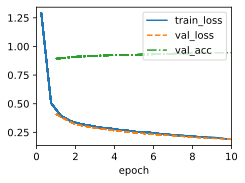

In [16]:
hyperparameters1 = {'num_outputs':10, 'num_hiddens':128, 'lr':0.1}

model1 = MLP1(**hyperparameters1)
trainer1 = d2l.Trainer(max_epochs=10)
trainer1.fit(model1, dataset)

### 2b) Modelo simples de MLP (porém com otimizador $\textit{Adam}$ em vez de descida por gradiente):

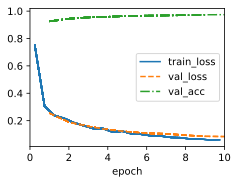

In [25]:
hyperparameters2 = {'num_outputs':10, 'num_hiddens':128, 'lr':0.001}

model2 = MLP2(**hyperparameters2)
trainer2 = d2l.Trainer(max_epochs=10)
trainer2.fit(model2, dataset)

### 2c) Modelo simples de MLP (porém com $\textit{ReLU}$ e $\textit{Adam}$):

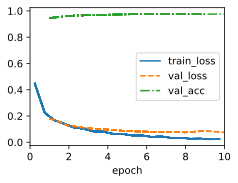

In [26]:
hyperparameters3 = {'num_outputs':10, 'num_hiddens':128, 'lr':0.001}

model3 = MLP3(**hyperparameters3)
trainer3 = d2l.Trainer(max_epochs=10)
trainer3.fit(model3, dataset)

### 2d) Modelo de MLP sem $\textit{Dropout}$ e com 2 $\textit{hidden layers}$:

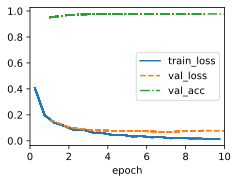

In [71]:
# 2d.1 (uma única camada oculta de 256 + ReLU + Adam)
hyperparameters4d1 = {'num_outputs':10, 'num_hiddens':256, 'lr':0.001}
model4d1 = MLP3(**hyperparameters4d1)  # reutiliza MLP3, pois é ReLU + Adam + uma camada oculta
trainer4d1 = d2l.Trainer(max_epochs=10)
trainer4d1.fit(model4d1, dataset)


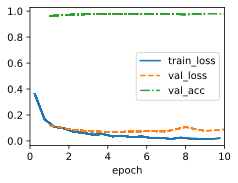

In [72]:
# 2d.2 (duas camadas [256, 256] + ReLU + Adam)
hyperparameters4d2 = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256, 'lr':0.001}
model4d2 = MLP4(**hyperparameters4d2)
trainer4d2 = d2l.Trainer(max_epochs=10)
trainer4d2.fit(model4d2, dataset)

### 2e) Modelo de MLP com $\textit{Dropout}$ e com 2 $\textit{hidden layers}$ (extra):

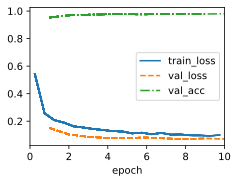

In [73]:
hyperparameters5 = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.001}

model5 = MLP_do(**hyperparameters5)
trainer5 = d2l.Trainer(max_epochs=10)
trainer5.fit(model5, dataset)

## 3. Avaliação

In [29]:
def evaluate_accuracy(model, data_iter):
	model.eval()
	metric = d2l.Accumulator(2)
	with torch.no_grad():		
		for X, y in data_iter:
			metric.add(d2l.accuracy(model(X), y), y.numel())
	model.train()
	return metric[0] / metric[1]

### 3a) Avaliação do modelo simples de MLP:

In [74]:
print('Final validation accuracy for the first model: ', evaluate_accuracy(model1, dataset.val_dataloader()))

Final validation accuracy for the first model:  0.9455


### 3b) Avaliação do modelo simples de MLP com otimizador $\textit{Adam}$:

In [75]:
print('Final validation accuracy for the second model: ', evaluate_accuracy(model2, dataset.val_dataloader()))

Final validation accuracy for the second model:  0.974


### 3c) Avaliação do modelo simples de MLP, com $\textit{ReLU}$ e $\textit{Adam}$:

In [76]:
print('Final validation accuracy for the third model: ', evaluate_accuracy(model3, dataset.val_dataloader()))

Final validation accuracy for the third model:  0.9773


### 3d) Avaliação do quarto modelo de MLP (2 camadas escondidas):

In [77]:
print('Final validation accuracy for the fourth model: ', evaluate_accuracy(model4, dataset.val_dataloader()))

Final validation accuracy for the fourth model:  0.9763


### 3e) Avaliação do modelo com $\textit{Dropout}$ (extra):

In [78]:
print('Final validation accuracy for the fifth model: ', evaluate_accuracy(model5, dataset.val_dataloader()))

Final validation accuracy for the fifth model:  0.9803


Considerando “o melhor” modelo como aquele que teve a maior acurácia no conjunto de validação, o melhor modelo é o "e" (com Dropout, extra).

## 4. Visualização de exemplos mal-classificados

In [37]:
def collect_misclassified(model, data_loader, device='cpu', max_samples=16):
    model.eval()
    misclassified = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            preds = logits.argmax(dim=1)
            wrong_mask = (preds != y_batch)
            if wrong_mask.any():
                err_indices = wrong_mask.nonzero(as_tuple=False).squeeze().tolist()
                if isinstance(err_indices, int):
                    err_indices = [err_indices]
                for idx in err_indices:
                    img = X_batch[idx].cpu().squeeze(0)  # [28,28]
                    true_lbl = int(y_batch[idx].cpu())
                    pred_lbl = int(preds[idx].cpu())
                    misclassified.append((img, true_lbl, pred_lbl))
                    if len(misclassified) >= max_samples:
                        return misclassified
    return misclassified

def plot_misclassified(miscls_list, nrow=4, ncol=4):
    fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*2, nrow*2))
    axes = axes.flatten()
    for i, (img, true_lbl, pred_lbl) in enumerate(miscls_list):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"T:{true_lbl} / P:{pred_lbl}", fontsize=10)
        axes[i].axis('off')
    for j in range(i+1, nrow*ncol):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
from torch.utils.data import DataLoader

batch_size = dataset.batch_size    
num_workers = dataset.num_workers  

# Cria um DataLoader PARA VALIDAÇÃO, mas com shuffle
val_loader_shuffled = DataLoader(
    dataset.val,             
    batch_size=batch_size,   
    shuffle=True,            
    num_workers=num_workers
)

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### 4a) Modelo simples de MLP (sem $\textit{Dropout}$ e com apenas 1 $\textit{hidden layer}$ e com função de ativação $\textit{Sigmoid}$):

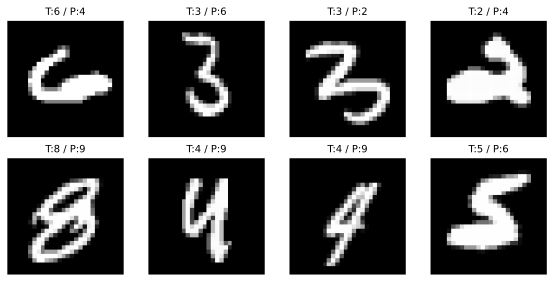

In [56]:
model1.to(device)
miscls = collect_misclassified(model1, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)


### 4b) Modelo simples de MLP (porém com otimizador $\textit{Adam}$ em vez de descida por gradiente):

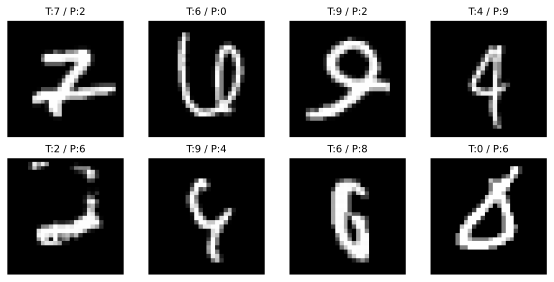

In [51]:
model2.to(device)
miscls = collect_misclassified(model2, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)


### 4c) Modelo simples de MLP (porém com $\textit{ReLU}$ e $\textit{Adam}$):

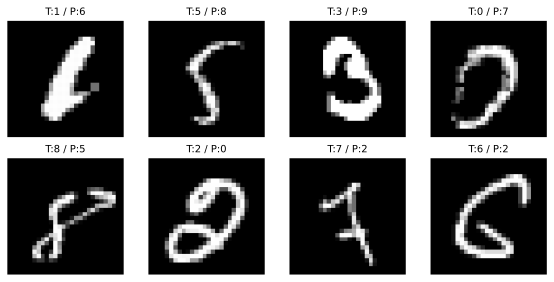

In [52]:
model3.to(device)
miscls = collect_misclassified(model3, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)


### 4d) Modelo de MLP sem $\textit{Dropout}$ e com 2 $\textit{hidden layers}$:

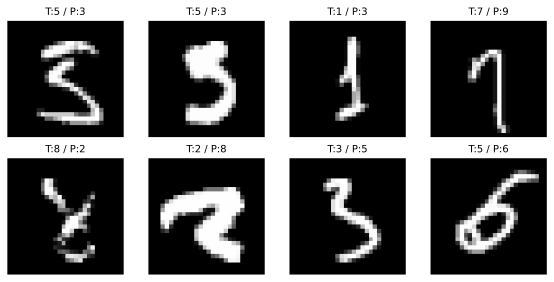

In [53]:
model4d1.to(device)
miscls = collect_misclassified(model4d1, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)

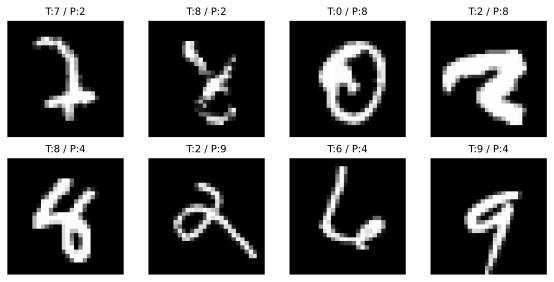

In [54]:
model4d2.to(device)
miscls = collect_misclassified(model4d2, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)

### 4e) Modelo de MLP com $\textit{Dropout}$ e com 2 $\textit{hidden layers}$ (extra):

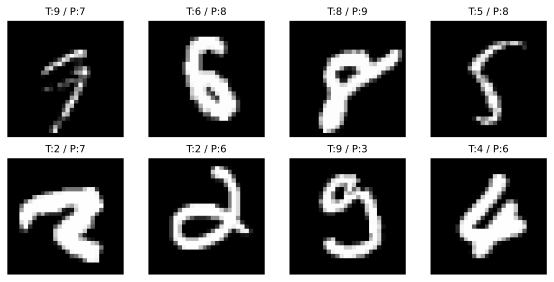

In [55]:
model5.to(device)
miscls = collect_misclassified(model5, val_loader_shuffled, device=device, max_samples=8)
plot_misclassified(miscls, nrow=2, ncol=4)

## 5. Matriz de confusão

In [ ]:
def collect_all_preds(model, data_loader, device='cpu'):
    model.eval()
    all_true = []
    all_pred = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            logits = model(X_batch)
            preds = logits.argmax(dim=1).cpu().numpy()
            all_pred.append(preds)
            all_true.append(y_batch.numpy())
    y_true = np.concatenate(all_true)
    y_pred = np.concatenate(all_pred)
    return y_true, y_pred

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    if normalize:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_to_plot = cm_norm
        fmt = '.2f'
    else:
        cm_to_plot = cm
        fmt = 'd'

    plt.figure(figsize=(8, 6))
    plt.imshow(cm_to_plot, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm_to_plot.max() / 2.0
    for i, j in itertools.product(range(cm_to_plot.shape[0]), range(cm_to_plot.shape[1])):
        plt.text(j, i,
                 format(cm_to_plot[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm_to_plot[i, j] > thresh else 'black')

    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.tight_layout()
    plt.show()


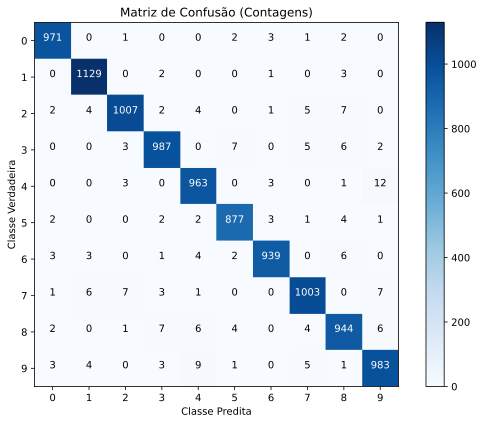

In [ ]:
model_best = model5    # Segundo a acurácia mais alta
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_best.to(device)

y_true, y_pred = collect_all_preds(model_best, dataset.val_dataloader(), device=device)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=list(range(10)), normalize=False,
                      title='Matriz de Confusão (Contagens)')


### Confusões Mais Comuns por Classe

A seguir, para cada dígito verdadeiro \(i in \{0,...,9\}\), identificamos a classe \(j neq i\) que foi mais frequentemente atribuída de forma incorreta (linha \(i\) da matriz de confusão). A última coluna indica quantas vezes a rede previu \(j\) em vez de \(i\).

| Classe Verdadeira \(i\) | Erro Mais Comum \(j\) | Contagem de Erros \(i \to j\) |
|:-----------------------:|:---------------------:|:----------------------------:|
|           0             |           6           |              3               |
|           1             |           7           |              3               |
|           2             |           8           |              7               |
|           3             |           5           |              7               |
|           4             |           9           |             12               |
|           5             |           8           |              4               |
|           6             |           8           |              6               |
|           7             |       2 e 9 (empatado)      |         7 (cada)          |
|           8             |           3           |              7               |
|           9             |           4           |              9               |

> **Obs.:** No caso de `7 → 2` e `7 → 9`, houve empate. Cada um ocorreu 7 vezes.


### Interpretação:

As confusões acima refletem semelhanças visuais entre algumas escritas manuscritas de dígitos. Vejamos, para cada par, por que isso pode acontecer:

1. **0 → 6 (3 erros)**  
   - Um “0” muito aberto ou um “6” com laço inferior mal fechado faz o modelo enxergar um segmento extra no meio, confundindo com “6”.

2. **1 → 7 (3 erros)**  
   - Se o “7” for escrito apenas com um traço vertical e um pequeno traço diagonal, pode ficar parecido com o “1” (e vice-versa).

3. **2 → 8 (7 erros)**  
   - Quando o “2” é desenhado com curvas fechadas, ou o “8” com loops pouco separados, ambos possuem dois arcos e acabam parecendo semelhantes.

4. **3 → 5 (7 erros)**  
   - Um “3” manuscrito com a parte superior mais achatada e um “5” com a “barriga” arredondada podem se assemelhar ao modelo.

5. **4 → 9 (12 erros)**  
   - O “9” esquecido de fechar o círculo inferior pode ficar parecido com o “4” se o traço vertical do “4” for bem marcado.  
   - Esse é o erro único mais frequente (12 ocorrências).

6. **5 → 8 (4 erros)**  
   - Quando o “5” fecha demais o laço superior ou combina traço vertical e laço inferior, o modelo enxerga dois loops (como no “8”).

7. **6 → 8 (6 erros)**  
   - Similar a “2 → 8”: se o “6” tiver o círculo aberto demais, o “8” (dois loops) pode parecer um único loop com traço solto.

8. **7 → 2 e 7 → 9 (7 erros cada)**  
   - O “7” sem traço horizontal definido pode confundir com o “9” (laço superior + traço vertical) ou com o “2” (laço superior inclinado).  
   - Por isso há empate: 7 foi confundido igualmente com 2 e com 9.

9. **8 → 3 (7 erros)**  
   - O “8” manuscrito como dois círculos pouco destacados (especialmente o superior) pode ser interpretado como apenas a parte superior do “3”.

10. **9 → 4 (9 erros)**  
    - Se o “9” não fecha totalmente o laço superior, o modelo pode enxergar apenas o traço vertical + traço superior, confundindo com “4”.


### Conclusão

- As confusões mais frequentes estão associadas a pares de dígitos que compartilham traços ou loops semelhantes quando escritos à mão.  
- O par **4 ↔ 9** é o que mais aparece (12 vezes “4” como “9” e 9 vezes “9” como “4”).  
- Outras confusões significativas envolvem dígitos com laços: **2 ↔ 8**, **6 ↔ 8**, **5 ↔ 8** e também **3 ↔ 5**.  
- No caso de “7”, a semelhança entre um traço simples e um laço parcial faz com que ocorra empate entre “2” e “9”.  

Esses resultados são esperados porque, na escrita manual, a variação nos traços pode tornar dígitos diferentes muito parecidos visualmente. A rede aprendeu justamente a capturar padrões estatísticos, mas ainda assim sofre quando há ambiguidade entre formas que, para um humano, também podem parecer próximas.  
